In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
#import and read in csv
nuance_df = pd.read_csv("Sales_Item_Merged.csv")
nuance_df['year'] = pd.DatetimeIndex(nuance_df['Date_Invoice']).year.astype(object)
nuance_df['month'] = pd.DatetimeIndex(nuance_df['Date_Invoice']).month.astype(object)
nuance_df

,Silo,Silo_Description,Cust_ID,name_cust,id_st,Date_Invoice,id_item,descr_1,qty_ship,price_net,code_cat_prdt,category,flag_stat_item,code_comm,Item_Add_date,year,month
0,I,Industrial,22777,USHER OIL COMPANY,MI,3/18/2019,1000ABS550,ACTIV VIII,8,1750.56,10,AC8000 MOD,A,FNSG,6/12/2015,2019,3
1,I,Industrial,22777,USHER OIL COMPANY,MI,5/21/2019,1000ABS550,ACTIV VIII,8,1838.08,10,AC8000 MOD,A,FNSG,6/12/2015,2019,5
2,I,Industrial,22777,USHER OIL COMPANY,MI,2/11/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG,6/12/2015,2020,2
3,I,Industrial,22777,USHER OIL COMPANY,MI,4/6/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG,6/12/2015,2020,4
4,I,Industrial,22777,USHER OIL COMPANY,MI,8/19/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG,6/12/2015,2020,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23367,I,Industrial,1801,MSP INDUSTRIES,MI,9/27/2019,ZS401,BRUSH-SPIRAL WRAP SCRUB BRUSH,2,1139.50,ZS,PDQ PARTS,A,FNSG,9/24/2019,2019,9
23368,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS402,BRUSH-HI DENSITY SCRUB BRUSH,2,822.50,ZS,PDQ PARTS,A,FNSG,10/11/2019,2019,10
23369,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS403,BRUSH-SIDE SCRUB BRUSH,1,207.00,ZS,PDQ PARTS,A,FNSG,10/11/2019,2019,10
23370,I,Industrial,12663,"LIBERTY STEEL INDUSTRIES, INC.",OH,10/24/2019,ZS404,BRUSH-GRIT SIDE SCRUB BRUSH.,1,469.00,ZS,PDQ PARTS,A,FNSG,10/14/2019,2019,10


## Top Items

In [3]:
#2019 data frame
twenty_19_sales = nuance_df.loc[nuance_df['year']== 2019]

#2020 data frame
twenty_20_sales = nuance_df.loc[nuance_df['year']== 2020]

In [4]:
# Determine Top Items 2019
top_items_df_2019 = twenty_19_sales.groupby(["id_item", "descr_1"]).sum()
top_items_df_2019.sort_values(by='qty_ship',
                      ascending=False).head(10)

,,qty_ship,price_net
id_item,descr_1,,
8289PLI600,BORDER 8L 331-TK LAMBERTI,570819,696399.18
6378SEV034,22810 7GEN DISF MULTI SURF,205989,1434360.43
8262PLI600,FS AMS MAX DR BULK 339-TKG,146907,152783.28
1600NUC040,NU-BRITE COIL CLNR (4291-08),135086,2154237.70
8289PLI601,BORDER 8L LAMBERTI 331-TK,84710,3388.40
NFCL16RDEA,"PINK 300GSM 16""CLOTH RD CORNER",68952,38243.88
NFCL16BLEA,NUFIBER GLASS/MIRR 16X16 BLUE,66384,56403.36
NFCL16BUEA,"BLUE 300GSM 16""CLOTH RD CORNER",65472,38664.24
NFCL16GREA,"GREEN 300GSM 16""CLTH RD CORNER",60036,35194.44


In [5]:
# Determine Top Items 2020
top_items_df_2020 = twenty_20_sales.groupby(["id_item", "descr_1"]).sum()
top_items_df_2020.sort_values(by='qty_ship',
                      ascending=False).head(10)

,,qty_ship,price_net
id_item,descr_1,,
8289PLI600,BORDER 8L 331-TK LAMBERTI,519108,633311.76
8289PLI601,BORDER 8L LAMBERTI 331-TK,188231,7801.82
1805EUP080,SHARK COMET VCM60 WATERFALL,149567,1112778.82
6378SEV034,22810 7GEN DISF MULTI SURF,148560,1175026.38
7073MMM030,3M TB QUAT DISINFECTANT,137873,1126422.41
8262PLI600,FS AMS MAX DR BULK 339-TKG,127910,133026.40
6378SEV037,22810 SEV DISF MULTI SURF,121394,965766.16
1600NUC040,NU-BRITE COIL CLNR (4291-08),114768,1825958.88
NFCL12BUEA,BLUE 12'CLOTH RND CORNER,105348,40236.36


In [6]:
new_new_df_2019 = top_items_df_2019.reset_index(level=0).sort_values(by='qty_ship',
                      ascending=False)
new_new_df_2019.head(10)

,id_item,qty_ship,price_net
descr_1,,,
BORDER 8L 331-TK LAMBERTI,8289PLI600,570819,696399.18
22810 7GEN DISF MULTI SURF,6378SEV034,205989,1434360.43
FS AMS MAX DR BULK 339-TKG,8262PLI600,146907,152783.28
NU-BRITE COIL CLNR (4291-08),1600NUC040,135086,2154237.70
BORDER 8L LAMBERTI 331-TK,8289PLI601,84710,3388.40
"PINK 300GSM 16""CLOTH RD CORNER",NFCL16RDEA,68952,38243.88
NUFIBER GLASS/MIRR 16X16 BLUE,NFCL16BLEA,66384,56403.36
"BLUE 300GSM 16""CLOTH RD CORNER",NFCL16BUEA,65472,38664.24
"GREEN 300GSM 16""CLTH RD CORNER",NFCL16GREA,60036,35194.44


In [7]:
new_new_df_2020 = top_items_df_2020.reset_index(level=0).sort_values(by='qty_ship',
                      ascending=False)
new_new_df_2020.head(10)

,id_item,qty_ship,price_net
descr_1,,,
BORDER 8L 331-TK LAMBERTI,8289PLI600,519108,633311.76
BORDER 8L LAMBERTI 331-TK,8289PLI601,188231,7801.82
SHARK COMET VCM60 WATERFALL,1805EUP080,149567,1112778.82
22810 7GEN DISF MULTI SURF,6378SEV034,148560,1175026.38
3M TB QUAT DISINFECTANT,7073MMM030,137873,1126422.41
FS AMS MAX DR BULK 339-TKG,8262PLI600,127910,133026.40
22810 SEV DISF MULTI SURF,6378SEV037,121394,965766.16
NU-BRITE COIL CLNR (4291-08),1600NUC040,114768,1825958.88
BLUE 12'CLOTH RND CORNER,NFCL12BUEA,105348,40236.36


<AxesSubplot:title={'center':'Top Products 2019'}, xlabel='Product Name', ylabel='Quantity'>

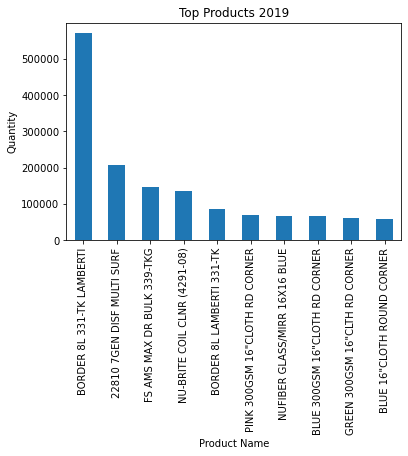

In [8]:
plot_2019 = new_new_df_2019['qty_ship'].head(10).plot(kind="bar")
plot_2019.set_xlabel("Product Name")
plot_2019.set_ylabel("Quantity")
plot_2019.set_title("Top Products 2019")

plot_2019

<AxesSubplot:title={'center':'Top Products 2020'}, xlabel='Product Name', ylabel='Quantity'>

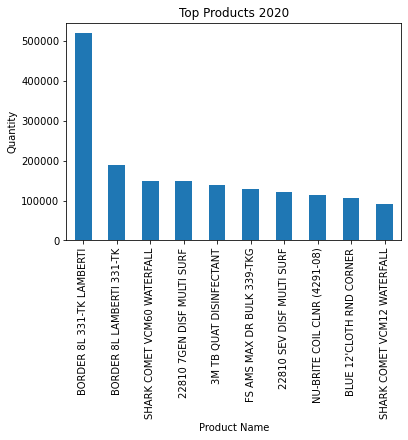

In [9]:
plot_2020 = new_new_df_2020['qty_ship'].head(10).plot(kind="bar")
plot_2020.set_xlabel("Product Name")
plot_2020.set_ylabel("Quantity")
plot_2020.set_title("Top Products 2020")

plot_2020

In [10]:
twenty19_labels = new_new_df_2019.head(10).index
twenty20_labels = new_new_df_2020.head(10).index

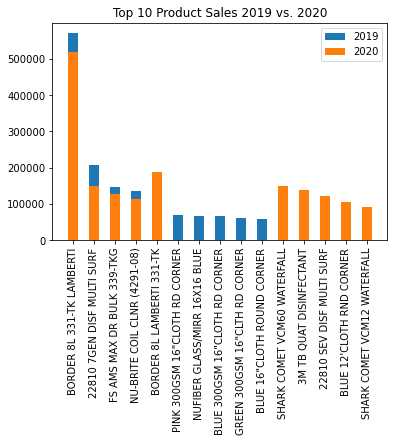

In [11]:
plt.bar(height = new_new_df_2019['qty_ship'].head(10), x = twenty19_labels, width = .5)
plt.bar(height = new_new_df_2020['qty_ship'].head(10), x = twenty20_labels, width = .5)
plt.title("Top 10 Product Sales 2019 vs. 2020")
plt.xticks(rotation=90)
plt.legend(['2019', '2020'], loc='upper right')
plt.savefig("top10products.png")
plt.show()

# Merged/New Plot (Products)

In [12]:
products_merged = pd.merge(new_new_df_2019.head(10), new_new_df_2020.head(10),
                          how="outer", on="descr_1", suffixes=("_2019", "_2020")).fillna(0)
products_merged

,id_item_2019,qty_ship_2019,price_net_2019,id_item_2020,qty_ship_2020,price_net_2020
descr_1,,,,,,
BORDER 8L 331-TK LAMBERTI,8289PLI600,570819.0,696399.18,8289PLI600,519108.0,633311.76
22810 7GEN DISF MULTI SURF,6378SEV034,205989.0,1434360.43,6378SEV034,148560.0,1175026.38
FS AMS MAX DR BULK 339-TKG,8262PLI600,146907.0,152783.28,8262PLI600,127910.0,133026.40
NU-BRITE COIL CLNR (4291-08),1600NUC040,135086.0,2154237.70,1600NUC040,114768.0,1825958.88
BORDER 8L LAMBERTI 331-TK,8289PLI601,84710.0,3388.40,8289PLI601,188231.0,7801.82
"PINK 300GSM 16""CLOTH RD CORNER",NFCL16RDEA,68952.0,38243.88,0,0.0,0.00
NUFIBER GLASS/MIRR 16X16 BLUE,NFCL16BLEA,66384.0,56403.36,0,0.0,0.00
"BLUE 300GSM 16""CLOTH RD CORNER",NFCL16BUEA,65472.0,38664.24,0,0.0,0.00
"GREEN 300GSM 16""CLTH RD CORNER",NFCL16GREA,60036.0,35194.44,0,0.0,0.00


In [13]:
xlabels = products_merged.reset_index(drop=False)
labels = xlabels["descr_1"]
twenty_19 = products_merged["qty_ship_2019"].to_numpy()
twenty_20 = products_merged["qty_ship_2020"].to_numpy()

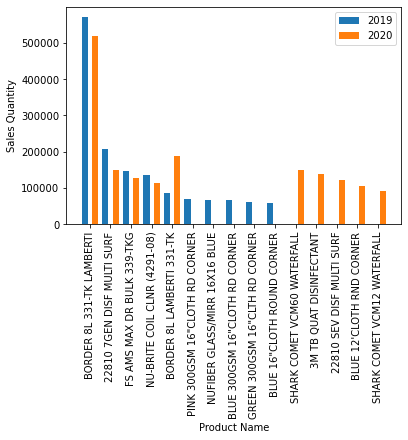

In [14]:
x = np.arange(len(xlabels))
w=.5
plt.bar(x, height = products_merged['qty_ship_2019'], width=.3)
plt.bar(x+w, height = products_merged['qty_ship_2020'], width = .3)
plt.xticks([i+w/2 for i in range(len(x))], labels, rotation=90)
plt.legend(loc="upper right", labels=['2019', '2020'])
plt.ylabel('Sales Quantity')
plt.xlabel('Product Name')
plt.show()

# Top Customers

In [15]:
# Determine Top Customers
customers_df_2019 = twenty_19_sales.groupby(["name_cust"]).sum().sort_values(by='qty_ship',
                      ascending=False)
customers_df_2019.head(10)

,qty_ship,price_net
name_cust,,
PRECISION LABORATORIES LLC,864689,2666460.58
"NU-CALGON WHOLESALERS, INC.",360572,6472697.02
CLEANWELL LLC,268593,2120676.08
EDWARD DON & CO.,150228,150044.71
ALLIED EAGLE SUPPLY,114000,132238.14
MASSCO MAINTENANCE SUPPLY,73104,113838.30
CHARLOTTE PRODUCTS LTD.,61062,1321758.32
NORTH AMERICAN CORPORATION,60626,72403.35
WAREHOUSE DIRECT,60246,64269.80


In [16]:
customers_df_2020 = twenty_20_sales.groupby(["name_cust"]).sum().sort_values(by='qty_ship',
                      ascending=False)
customers_df_2020.head(10)

,qty_ship,price_net
name_cust,,
PRECISION LABORATORIES LLC,894610,2669188.35
CLEANWELL LLC,405604,4049151.44
"NU-CALGON WHOLESALERS, INC.",322616,5861516.38
SHARK NINJA OPERATING LLC,233532,1823296.33
3M COMPANY,173640,1431028.38
NORTH AMERICAN CORPORATION,135521,95825.13
ALLIED EAGLE SUPPLY,132657,148923.08
EDWARD DON & CO.,86567,108571.77
CHARLOTTE PRODUCTS LTD.,84667,1820047.02


In [17]:
twenty19_labels = customers_df_2019.head(10).index
twenty20_labels = customers_df_2020.head(10).index

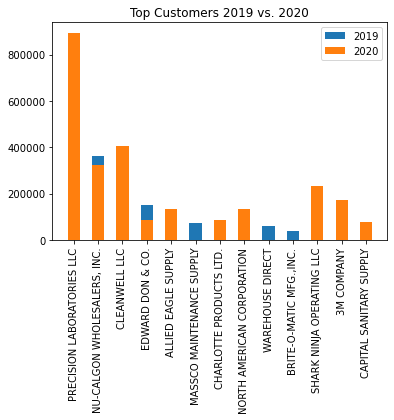

In [26]:
plt.bar(height = customers_df_2019['qty_ship'].head(10), x = twenty19_labels, width = .5)
plt.bar(height = customers_df_2020['qty_ship'].head(10), x = twenty20_labels, width = .5)
plt.title("Top Customers 2019 vs. 2020")
plt.xticks(rotation=90)
plt.legend(['2019', '2020'], loc='upper right')
plt.savefig("top10customers")
plt.show()

# Merged/New Plot (Customers)

In [19]:
customer_merge = pd.merge(customers_df_2019.head(10), customers_df_2020.head(10),
                          how="outer", on="name_cust", suffixes=("_2019", "_2020")).fillna(0)
customer_merge

,qty_ship_2019,price_net_2019,qty_ship_2020,price_net_2020
name_cust,,,,
PRECISION LABORATORIES LLC,864689.0,2666460.58,894610.0,2669188.35
"NU-CALGON WHOLESALERS, INC.",360572.0,6472697.02,322616.0,5861516.38
CLEANWELL LLC,268593.0,2120676.08,405604.0,4049151.44
EDWARD DON & CO.,150228.0,150044.71,86567.0,108571.77
ALLIED EAGLE SUPPLY,114000.0,132238.14,132657.0,148923.08
MASSCO MAINTENANCE SUPPLY,73104.0,113838.30,0.0,0.00
CHARLOTTE PRODUCTS LTD.,61062.0,1321758.32,84667.0,1820047.02
NORTH AMERICAN CORPORATION,60626.0,72403.35,135521.0,95825.13
WAREHOUSE DIRECT,60246.0,64269.80,0.0,0.00


# Customers vs. Avg Quantity Purchased

In [20]:
#customers and avg quantity
avg_quantity_2019 = twenty_19_sales.groupby(["name_cust"]).mean()
avg_quantity_2019

,qty_ship,price_net
name_cust,,
1ST AYD CORP.,1.285714,194.625714
A & A MAINTENANCE ENTERPRISE,62.013850,118.353767
"A & L SALES, INC.",20.833333,142.252778
"A-Z JANITORIAL SERVICE, LLC",94.014706,208.647206
AAA CONSTRUCTION & DEVELOPMENT,7.333333,11742.786667
...,...,...
"WILBUR ELLIS COMPANY, LLC",36.000000,1890.000000
"YASKAWA AMERICA, INC",1.000000,75.000000
"YASKAWA ELECTRIC AMERICA, INC",1.000000,55.550000


In [21]:
avg_quantity_2020 = twenty_20_sales.groupby(["name_cust"]).mean()
avg_quantity_2020

,qty_ship,price_net
name_cust,,
1ST AYD CORP.,2.000000,353.802105
3M COMPANY,2630.909091,21682.248182
A & A MAINTENANCE ENTERPRISE,84.109375,213.880781
"A & L SALES, INC.",17.650000,173.419500
"A-Z JANITORIAL SERVICE, LLC",174.171429,278.558571
...,...,...
WIESE - ST. LOUIS,11.152542,735.459153
"WILBUR ELLIS COMPANY, LLC",36.000000,1959.840000
"YASKAWA AMERICA, INC",1.000000,78.750000


In [22]:
merged_average = pd.merge(avg_quantity_2019, avg_quantity_2020, on="name_cust").reset_index().sample(50)
merged_average

,name_cust,qty_ship_x,price_net_x,qty_ship_y,price_net_y
83,JEFF SUPPLIES PTE LTD,6.000000,8244.000000,6.000000,8244.000000
17,ASPEN CHEMICAL & SUPPLY,8.500000,210.787500,275.714286,279.970000
88,"LAKELAND SUPPLY, INC.",27.666667,1554.856111,22.108108,1604.722432
143,SOUTHERN SWEEPERS & SCRUBBERS,10.483516,1142.648132,25.065217,1427.719565
12,AM-TECH,25.750000,3496.482500,12.000000,1504.440000
60,FOUNTAIN INDUSTRIES LLC,3.000000,8753.670000,21.500000,1438.025000
140,SHARK NINJA OPERATING LLC,1572.529412,9176.121176,2048.526316,15993.827456
26,BEYOND GREEN SUPPLY,47.784615,201.204308,60.080000,238.151200
23,BARKEFELLERS NORTHEAST,5.615385,675.604615,6.625000,734.805625
134,"ROYAL PAPERS, INC.",32.752294,282.709633,26.610526,219.185895


In [ ]:
ax=plt.gca()

merged_average.plot(kind='line', x='name_cust', y='qty_ship_x', color="blue", ax=ax)
merged_average.plot(kind='line', x='name_cust', y='qty_ship_y', color="red", ax=ax)

plt.xlabel("Customer Name")
plt.ylabel("Quantity Purchased")
plt.title("Average Quantity Products Purchased 2019 vs. 2020")
plt.legend(['2019', '2020'], loc='upper right')
plt.xticks(rotation=90)
plt.figure(figsize=(200,200))
plt.tight_layout()
plt.savefig("avg_quantity_comparison")
plt.show()

# Top 10 Products Bucketed by Category